In [1]:
# Preamble

from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [43]:
# Define  the WISE SFR conversions:
import astropy.units as u

# Chang+15 (WISE) -----------------------------

def L12_to_sfr(L12,snr=None):
    log_sfr = L12 - 9.18
    if snr == None:
        return log_sfr
    else:
        noise = 10**L12/snr
        L12_low = np.log10(10**(L12) + noise)
        L12_high = np.log10(10**(L12) - noise)
        log_sfr_lower = L12_low - 9.18
        log_sfr_upper = L12_high - 9.18
        return log_sfr, log_sfr_lower, log_sfr_upper
    

def L22_to_sfr(L22,snr=None):
    log_sfr = L22 - 9.08
    if snr == None:
        return log_sfr
    else:
        noise = 10**L22/snr
        L22_low = np.log10(10**(L22) + noise)
        L22_high = np.log10(10**(L22) - noise)
        log_sfr_lower = L22_low - 9.08
        log_sfr_upper = L22_high - 9.08
        return log_sfr, log_sfr_lower, log_sfr_upper
    
# Buat+08 (FUV) -----------------------------
    
def FUV_to_sfr(FUV_Mag,Mag_error=None):
    def Mag_to_sfr(Mag):
        L = 10**((4.74-Mag)/2.5) # convert Mags -> luminosity
        return 10**(-9.69)*L -0.03 # chabrier (2003) = -0.03
    sfr = Mag_to_sfr(FUV_Mag)
    if Mag_error == None:
        return np.log10(sfr)
    else:
        Mag_high = Mag - Mag_error
        Mag_low = Mag + Mag_error
        sfr_lower, sfr_upper = [Mag_to_SFR(M) for M in [Mag_upper,Mag_lower]]
        log_sfr, log_sfr_lower, log_sfr_upper = [np.log10(s) for s in [sfr, sfr_lower, sfr_upper]]
        return log_sfr, log_sfr_lower, log_sfr_upper

In [21]:
#nsa_matched = Table.read('../matched_fits/nsa_matched.fits')
#gz_data = Table.read('../../../fits/full_sample_debiased_w_low_z.fits')
#chang_out_matched = Table.read('../matched_fits/chang_out_matched.fits')
#samples = Table.read('../matched_fits/samples.fits')

In [38]:
mass_limited = samples['in_mass_limit']
mass_limited_spirals = (samples['in_mass_limit']) & (samples['in_spiral']) & (samples['axial_ok'])

In [41]:
fuv_Mags = nsa_matched['M_corrected'][:,0][mass_limited]
L22 = chang_out_matched['lrest_w3'][mass_limited]

In [45]:
sfr_uv = FUV_to_sfr(fuv_Mags)
sfr_nir = L22_to_sfr(L22)
sfr_total = np.log10(10**sfr_uv + 10**sfr_nir)
sfr_ratio = np.log10(10**sfr_uv/10**sfr_nir)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10


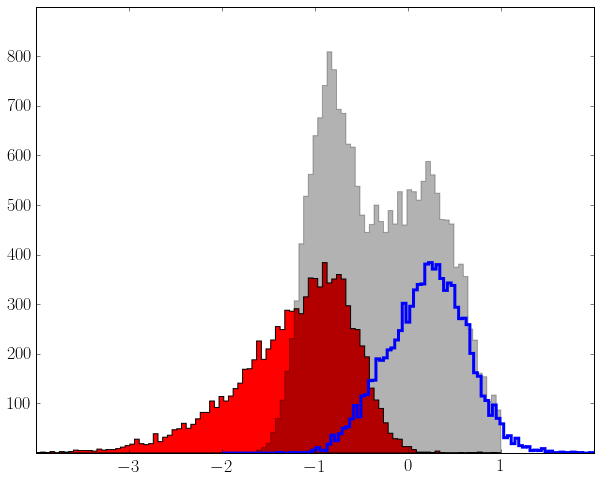

In [54]:
_ = plt.hist(sfr_uv,bins=np.linspace(-4,1,100),color='r',histtype='stepfilled',label='SFR (FUV)')
_ = plt.hist(sfr_nir,bins=np.linspace(-4,1,100),color='k',histtype='stepfilled',alpha=0.3,label='SFR (22 micron)')
_ = plt.hist(sfr_total,bins=np.linspace(-2,2,100),color='b',lw=3,histtype='step',label='SFR (total)')

In [56]:
uv_factor = 10**(-9.69)
ir_factor = 0.83*(10**(-9.125))

In [57]:
uv_factor/ir_factor

0.3280363021780621